In [22]:
import pandas as pd
df = pd.read_csv('/Churn_Modelling.csv')
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Remove ID related columns if present
cols_to_remove = ["RowNumber", "CustomerId", "Surname"]
df = df.drop(columns=[c for c in cols_to_remove if c in df.columns])

# Convert categorical data to numeric
encoder_gender = LabelEncoder()
encoder_geo = LabelEncoder()

df["Gender"] = encoder_gender.fit_transform(df["Gender"])
df["Geography"] = encoder_geo.fit_transform(df["Geography"])

# Separate predictors and output
features = df.loc[:, df.columns != "Exited"]
target = df["Exited"]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, shuffle=True, random_state=1
)

# Standardize feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build ANN model
ann_model = Sequential([
    Dense(16, activation="relu", input_dim=X_train.shape[1]),
    Dense(32, activation="relu"),
    Dropout(0.2),
    Dense(12, activation="relu"),
    Dense(1, activation="sigmoid")
])

# Compile ANN
ann_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

ann_model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 12)             │           396 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,129 (4.41 KB)

 Trainable params: 1,129 (4.41 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
training_history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=64,
    epochs=10,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8776 - loss: 0.3035 - val_accuracy: 0.8487 - val_loss: 0.3695
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8678 - loss: 0.3209 - val_accuracy: 0.8500 - val_loss: 0.3719
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8738 - loss: 0.3107 - val_accuracy: 0.8456 - val_loss: 0.3738
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8773 - loss: 0.3163 - val_accuracy: 0.8462 - val_loss: 0.3743
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8716 - loss: 0.3089 - val_accuracy: 0.8481 - val_loss: 0.3731
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8740 - loss: 0.3101 - val_accuracy: 0.8400 - val_loss: 0.3760
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8723 - loss: 0.3046 - val_accuracy: 0.8444 - val_loss: 0.3721
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8722 - loss: 0.3181 - val_accuracy: 0

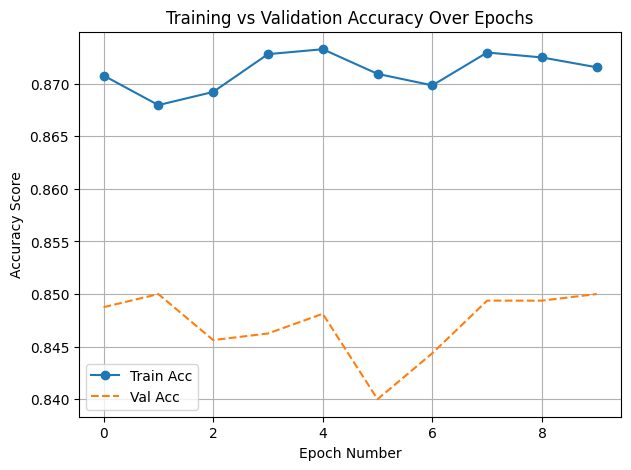

In [ ]:
import matplotlib.pyplot as plt

epochs_range = range(len(training_history.history["accuracy"]))

plt.figure(figsize=(7,5))
plt.plot(epochs_range, training_history.history["accuracy"], marker="o")
plt.plot(epochs_range, training_history.history["val_accuracy"], linestyle="--")

plt.title("Training vs Validation Accuracy Over Epochs")
plt.xlabel("Epoch Number")
plt.ylabel("Accuracy Score")
plt.grid(True)
plt.legend(["Train Acc", "Val Acc"])
plt.show()


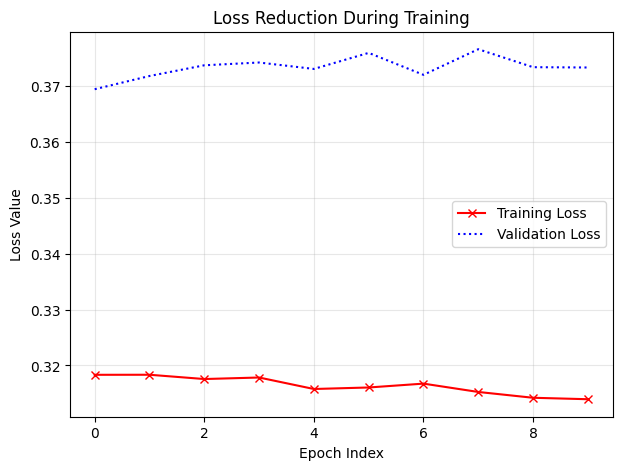

In [ ]:
import matplotlib.pyplot as plt

epochs_range = range(len(training_history.history["loss"]))

plt.figure(figsize=(7,5))
plt.plot(epochs_range, training_history.history["loss"], color="red", marker="x")
plt.plot(epochs_range, training_history.history["val_loss"], color="blue", linestyle=":")

plt.title("Loss Reduction During Training")
plt.xlabel("Epoch Index")
plt.ylabel("Loss Value")
plt.grid(alpha=0.3)
plt.legend(["Training Loss", "Validation Loss"])
plt.show()
